In [22]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('soft.csv');
#df.head(2)
df.head(5)

,Time,Fault
0,0,0
1,1,6
2,2,1
3,3,1
4,4,0


In [23]:
length=len(df['Fault'])
sum=0;
for i in range(1,length):
    sum= sum+df['Fault'][i]
    df['Fault'][i]=sum
    #print(sum)

df.head(5)

,Time,Fault
0,0,0
1,1,6
2,2,7
3,3,8
4,4,8


In [12]:
#ax = sns.distplot(df)

In [24]:
df['Fault1']=df['Fault']
df['Time1']=df[df.columns[0]]

In [19]:

df.Fault1=df.Fault1.astype(float)
df.Time1=df.Time1.astype(float)


<ipython-input-19-c02156042d11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time1'][1] =math.log(df[df.columns[0]][1],10)


In [20]:

length= len(df['Fault1'])
for i in range(1,length):
    df['Fault1'][i]=math.log(df['Fault'][i],10)
    df['Time1'][i] =math.log(df[df.columns[0]][i],10)  

  
    
   

<ipython-input-20-cbee7143bcb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault1'][i]=math.log(df['Fault'][i],10)
<ipython-input-20-cbee7143bcb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time1'][i] =math.log(df[df.columns[0]][i],10)


In [9]:
mean_x=np.mean(df['Time1'])
mean_y=np.mean(df['Fault1'])

numer=0.0
dnum=0.0


In [10]:
for i in range(length):
    numer+=(df['Time1'][i]-mean_x)*(df['Fault1'][i]-mean_y)
    dnum+=(df['Time1'][i]-mean_x)*(df['Time1'][i]-mean_x)
    

In [11]:
cof_= numer/dnum
print(cof_)

0.9789455928667367


In [12]:
intercept_=mean_y -(mean_x*cof_)
print(intercept_)

0.39053382410382875


In [13]:
def predeict(x):
    return x*cof_+intercept_


In [14]:
#predeict(1)
predeict(math.log(6,10))

1.152301561250637

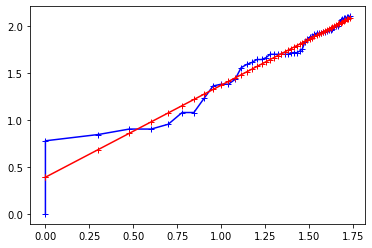

In [15]:
plt.xlabel='Year'
plt.ylabel='Fault'
#plt.scatter(df.Year,df.percent,color='RED', marker='+')
plt.plot(df['Time1'],df.Fault1,color='blue',marker='+')
plt.plot(df['Time1'], predeict(df['Time1']),color='RED',marker='+')



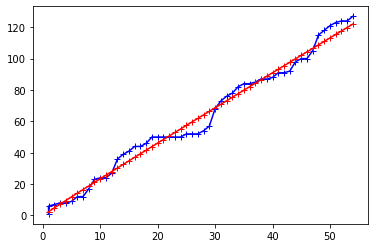

In [16]:
plt.plot(10**df['Time1'],10**df.Fault1,color='blue',marker='+')
plt.plot(10**df['Time1'],10** predeict(df['Time1']),color='RED',marker='+')